# Práctica 2

In [ ]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

## TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

Valor máximo de píxeles blancos por fila (maxfil): 0.4296875
Filas con número de píxeles ≥ 0.9*maxfil: Son 7 filas: [6, 12, 15, 20, 21, 88, 100]


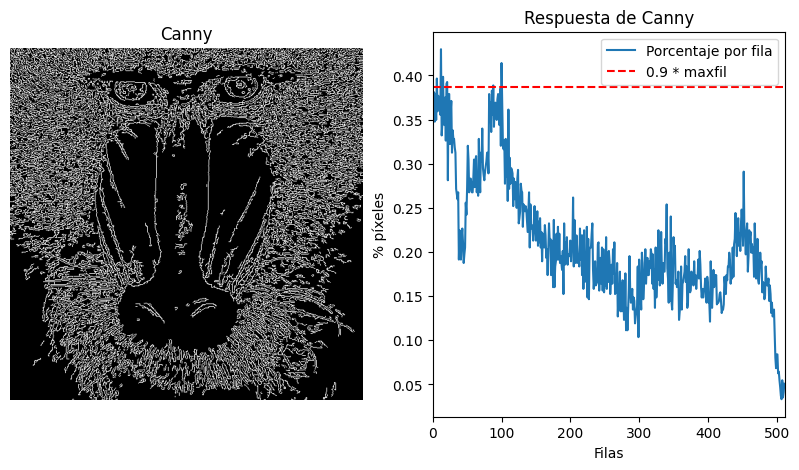

In [3]:
img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)

# Cuenta el número de píxeles blancos por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al número de columnas y al valor máximo del píxel (255)
# El resultado será el porcentaje de píxeles blancos por fila
rows = row_counts[:,0] / (255 * canny.shape[1])

# Maximo valor de píxeles blancos por fila
maxfil = np.max(rows)

# Umbral del 90%
umbral = 0.9 * maxfil

# Posiciones (filas) que cumplen la condición
filas_umbral = []

idx = 0
for row in rows:
    if umbral <= row:
        filas_umbral.append(idx)
    idx += 1

# filas_umbral = np.where(rows >= umbral)[0]

print(f"Valor máximo de píxeles blancos por fila (maxfil): {maxfil}")
print(f"Filas con número de píxeles ≥ 0.9*maxfil: Son {len(filas_umbral)} filas: {filas_umbral}")

# --- Gráfica ---
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny") 
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows, label="Porcentaje por fila")
plt.axhline(umbral, color="r", linestyle="--", label="0.9 * maxfil")
plt.legend()

# Rango en x definido por las filas
plt.xlim([0, canny.shape[0]])
plt.show()

## TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Valor máximo de píxeles blancos por fila (maxfil): 0.267578125
Filas con número de píxeles ≥ 0.9*maxfil: Son 7 filas: [ 3  4 11 20 51 81 82]
Valor máximo de píxeles blancos por columna (maxcol): 0.314453125
Columnas con número de píxeles ≥ 0.9*maxcol: Son 1 columnas: [288]


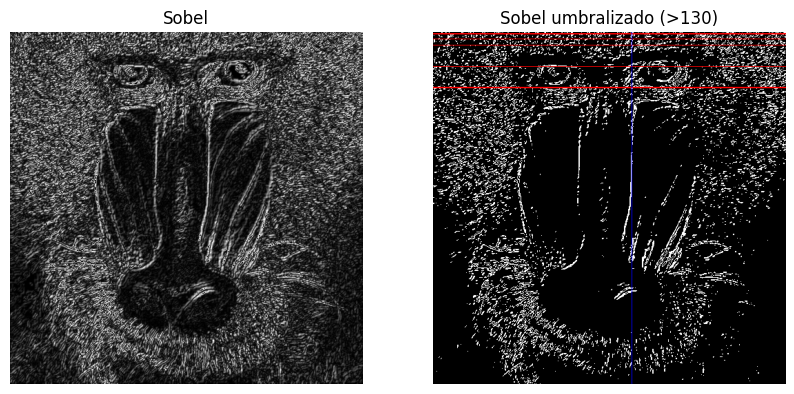

In [4]:
img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
sobel = cv2.add(sobelx, sobely)

# Sobel convertido a byte
sobel8np = np.uint8(np.abs(sobel))

# Umbralizado de Sobel
umbral_val = 130
_, sobel_umbral = cv2.threshold(sobel8np, umbral_val, 255, cv2.THRESH_BINARY)

# Conteo por fila y normalización
row_counts = cv2.reduce(sobel_umbral, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:,0] / (255 * sobel_umbral.shape[1])

# Conteo por columna y normalización
col_counts = cv2.reduce(sobel_umbral, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * sobel_umbral.shape[0])

# Cálculo de maxfil y maxcol
maxfil = np.max(rows)
umbral_filas = 0.9 * maxfil
posicion_filas = np.where(rows >= umbral_filas)[0]

maxcol = np.max(cols)
umbral_columnas = 0.9 * maxcol
posicion_columnas = np.where(cols >= umbral_columnas)[0]

print(f"Valor máximo de píxeles blancos por fila (maxfil): {maxfil}")
print(f"Filas con número de píxeles ≥ 0.9*maxfil: Son {len(posicion_filas)} filas: {posicion_filas}")
print(f"Valor máximo de píxeles blancos por columna (maxcol): {maxcol}")
print(f"Columnas con número de píxeles ≥ 0.9*maxcol: Son {len(posicion_columnas)} columnas: {posicion_columnas}")  

# --- Gráfica ---
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sobel8np, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Sobel")

plt.subplot(1, 2, 2)
mandril_color = cv2.cvtColor(sobel_umbral, cv2.COLOR_GRAY2BGR)

# Dibujar filas en rojo
for f in posicion_filas:
    cv2.line(mandril_color, (0, f), (mandril_color.shape[1]-1, f), (0, 0, 255), 1)

# Dibujar columnas en azul
for c in posicion_columnas:
    cv2.line(mandril_color, (c, 0), (c, mandril_color.shape[0]-1), (255, 0, 0), 1)

plt.imshow(cv2.cvtColor(mandril_color, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Sobel umbralizado (>130)")
plt.show()


## TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [10]:
vid = cv2.VideoCapture(0)
ancho, alto = 640, 480

# Modo inicial
modo = 1  

while True:
    ret, frame = vid.read()
    if not ret:
        break

    frame = cv2.resize(frame, (ancho, alto))

    if modo == 1:
        # ---------- MODO 1 ----------
        vista = frame.copy()

    elif modo == 2:
        # ---------- MODO 2 ----------
        pixelated = cv2.resize(frame, (ancho//10, alto//10), interpolation=cv2.INTER_AREA)
        pixelated = cv2.resize(pixelated, (ancho, alto), interpolation=cv2.INTER_NEAREST)
        vista = cv2.applyColorMap(pixelated, cv2.COLORMAP_JET)

    elif modo == 3:
        # ---------- MODO 3 ----------
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gris, (3, 3), 0)

        # Bordes con distintos umbrales
        edges_b = cv2.Canny(blur, 30, 60)   # Bordes azules
        edges_g = cv2.Canny(blur, 60, 120)  # Bordes verdes
        edges_r = cv2.Canny(blur, 120, 240) # Bordes rojos

        # Crea imagen negra para bordes en color
        bordes_color = np.zeros_like(frame)

        # Asignar colores según umbral
        bordes_color[edges_b != 0] = [255, 0, 0]   # Azul
        bordes_color[edges_g != 0] = [0, 255, 0]   # Verde
        bordes_color[edges_r != 0] = [0, 0, 255]   # Rojo

        # Superponer sobre la imagen original
        vista = cv2.addWeighted(frame, 0.5, bordes_color, 1, 0)

    # -------- Instrucciones --------
    instrucciones = "1 = Original | 2 = Pixel + Color | 3 = Movimiento | ESC = Salir"
    cv2.putText(vista, instrucciones, (40, alto - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Mostrar ventana
    cv2.imshow('Demostrador OpenCV', vista)

    tecla = cv2.waitKey(20)
    if tecla == 27:  # ESC para salir
        break
    elif tecla == ord('1'):
        modo = 1
    elif tecla == ord('2'):
        modo = 2
    elif tecla == ord('3'):
        modo = 3

# Liberar recursos
vid.release()
cv2.destroyAllWindows()

### TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.